In [236]:
library(igraph)

In [237]:
G <- read.graph("../output/edge_list.txt",format="ncol",directed=FALSE)

In [238]:
feat <- read.csv('../output/feat_list.txt', header=TRUE, sep='|')

In [239]:
G <- set_vertex_attr(G, 'display_name', index=V(G), value=as.character(feat$name))

In [240]:
G <- set_vertex_attr(G, 'location', index=V(G), value=as.character(feat$coordinate))

In [216]:
group <- decompose.graph(G)

In [249]:
vcount(group[[1]])

[1] 1880

In [218]:
ecount(group[[1]])

[1] 311802

In [250]:
new_G <- group[[1]]
spanning_tree <- mst(new_G)
ecount(spanning_tree)

[1] 1879

In [105]:
E(spanning_tree)

+ 1879/1879 edges from 12f1c25 (vertex names):
 [1] 828 --1624 1450--1732 721 --455  1484--1550 2022--749  2620--2349
 [7] 2633--2219 2052--246  1014--1623 965 --1780 685 --2249 1909--719 
[13] 1117--2119 308 --1847 1530--2214 436 --2173 1283--1887 1689--642 
[19] 1456--410  1524--1523 886 --1030 1849--1848 1062--593  2534--485 
[25] 2239--1399 2488--2653 2452--314  919 --1911 2523--2149 939 --599 
[31] 1753--974  2110--1170 650 --206  2522--1943 1814--1148 2496--1696
[37] 1453--1752 1748--2510 1255--2161 2611--1093 1759--1762 892 --622 
[43] 2355--2394 827 --2192 897 --2122 1027--1642 1938--2631 2025--2273
[49] 1335--1334 1928--1926 1978--1426 750 --877  986 --178  722 --2535
[55] 1361--1358 2272--1185 2562--1156 701 --2402 2607--2240 146 --2067
+ ... omitted several edges

In [251]:
V(spanning_tree)[V(spanning_tree)$name=='828']$display_name
V(spanning_tree)[V(spanning_tree)$name=='1624']$display_name

[1] "4200 Amargosa Drive, Antioch"

[1] "2900 Roosevelt Lane, Antioch"

In [252]:
V(spanning_tree)[V(spanning_tree)$name=='1484']$display_name
V(spanning_tree)[V(spanning_tree)$name=='1550']$display_name

[1] "29300 Lassen Street, Tennyson - Alquire, Hayward"

[1] "30800 San Clemente Street, Hayward"

In [253]:
V(spanning_tree)[V(spanning_tree)$name=='2523']$display_name
V(spanning_tree)[V(spanning_tree)$name=='2149']$display_name

[1] "3300 Rocky Mountain Drive, Alum Rock, San Jose"

[1] "2200 Vista Verde Drive, East San Jose, San Jose"

In [254]:
triangle_list <- triangles(new_G)
node_sample <- seq(1, length(triangle_list), 3)

In [234]:
node_list <- sample(node_sample, 1000)

In [222]:
triangle_ineq <- function(e1, e2, e3) {
    if (e1 + e2 > e3) {
        return (1)
    }else if (e2 + e3 > e1) {
        return (1)
    }else if (e1 + e3 > e2) {
        return (1)
    }else {
        return (0)
    }
}

In [235]:
count = 0
for (i in node_list) {
    edge <- E(new_G)
    x <- V(new_G)[triangle_list[i]]$name
    y <- V(new_G)[triangle_list[i + 1]]$name
    z <- V(new_G)[triangle_list[i + 2]]$name
    e1 <- get.edge.ids(new_G, vp=c(x, y))
    e2 <- get.edge.ids(new_G, vp=c(x, z))
    e3 <- get.edge.ids(new_G, vp=c(y, z))
    e1_len <- edge[e1]$weight
    e2_len <- edge[e2]$weight
    e3_len <- edge[e3]$weight
    count = count + triangle_ineq(e1_len, e2_len, e3_len)
}
percentage <- count / 1000

In [294]:
trail <- dfs(spanning_tree, V(spanning_tree)[1])
t_order <- trail$order

In [298]:
i = 1
weight = 0
while (i < length(t_order)-1) {
    edge_id <- get.edge.ids(spanning_tree, vp=c(V(new_G)[t_order[i]]$name, V(new_G)[t_order[i+1]]$name))
    if (edge_id == 0) {
        weight = weight + distances(new_G, V(new_G)[V(spanning_tree)[t_order[i]]$name==V(new_G)$name], V(new_G)[V(spanning_tree)[t_order[i+1]]$name==V(new_G)$name])[[1]]
    }else {
        weight = weight + E(spanning_tree)[edge_id]$weight
    }
    i = i+1
}


In [299]:
weight

[1] 439356.8

In [302]:
bot = 0
for (edge in E(spanning_tree)) {
    bot = bot + E(spanning_tree)[edge]$weight
}
weight / bot

[1] 1.572455

In [344]:
tra <- graph.empty()
i = 1
while (i < length(t_order)) {
    x <- t_order[i]$name
    y <- t_order[i+1]$name
    if (i == 1) {
            tra <- add_vertices(tra, 1, name = x)
    }
    tra <- add_vertices(tra, 1, name = y)
    tra <- add_edges(tra, c(i, i+1))
    i <- i + 1
}

In [345]:
V(tra)

+ 1880/1880 vertices, named, from f8c1a97:
   [1] 1938 1241 2514 1388 2488 1873 251  309  349  1877 921  273  1406 2515
  [15] 566  2233 1385 1870 1876 1387 565  157  1407 38   1409 3    567  1396
  [29] 2527 2238 1965 1966 568  747  1896 88   1399 2239 2701 1444 344  2108
  [43] 2109 2564 1154 1155 2125 2107 1972 1429 1978 1426 2390 1971 215  1440
  [57] 240  1441 1979 1813 1809 172  2243 1808 2341 2529 1807 1806 365  1992
  [71] 938  2242 1432 1804 252  274  312  1805 2659 1495 1425 1969 1967 1439
  [85] 239  1431 1989 2528 1981 89   420  748  1968 2241 238  1970 268  1424
  [99] 1980 2335 2271 2113 2655 2662 1174 948  2270 2269 69   787  378  884 
 [113] 2507 2123 2122 2259 2479 786  1173 1172 2111 16   2112 2258 776  1171
 [127] 17   2110 1170 2478 2563 847  2015 897  160  2124 1161 2562 1156 1157
+ ... omitted several vertices

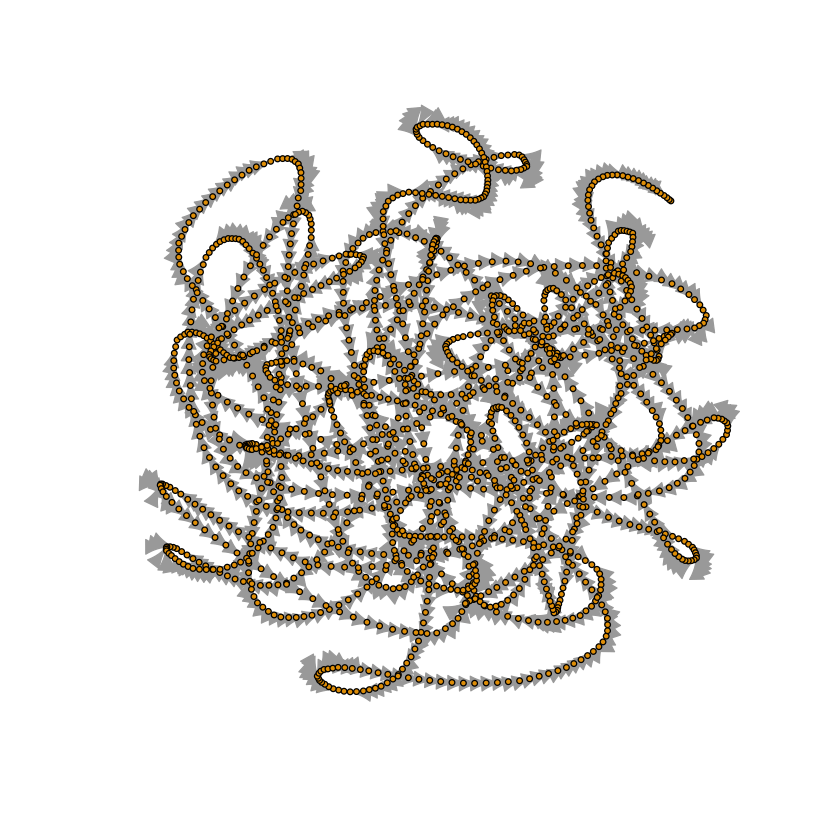

In [348]:
plot(tra, vertex.label = NA, vertex.size = 2.0, edge.width = 0.5, arrow.width = 0.6)